In [1]:
import os
import gc
import pickle
import itertools
import numpy as np
import pandas as pd
from tqdm import tqdm_notebook
import warnings
warnings.filterwarnings('ignore')

# self-defined functions
# from helper import *
# from tabu_helper import *
from tabu import tabu_search

import matplotlib.pyplot as plt
%matplotlib inline 

In [2]:
currentPath = os.getcwd()

In [3]:
with open(currentPath + '/clean_data/sectorMap.pkl', 'rb') as f:
    sectorMap = pickle.load(f)
    
with open(currentPath + '/clean_data/inv_sectorMap.pkl', 'rb') as f:
    inv_sectorMap = pickle.load(f)

with open(currentPath + '/clean_data/ratingMap.pkl', 'rb') as f:
    ratingMap = pickle.load(f)
    
train = pd.read_csv(currentPath + '/clean_data/train.csv', index_col=0)
test = pd.read_csv(currentPath + '/clean_data/test.csv', index_col=0)
corr = pd.read_csv(currentPath + '/clean_data/corr.csv', index_col=0)
varDF = pd.read_csv(currentPath + '/clean_data/var.csv', index_col=0)

train.index = pd.DatetimeIndex(train.index)
test.index = pd.DatetimeIndex(test.index)

In [4]:
alpha = 0.05
check_params = {
    "sectorMap": sectorMap,
    "inv_sectorMap": inv_sectorMap,
    "corr_df": corr,
    "risk_series": varDF[str(alpha)],
    "snum_ub": 30,
    "snum_lb": 10,
    "sector_snum_ub": 6,
    "corr_ub": 0.5,
    "risk_all_ub": 0,
    "risk_ind_ub": 0,
    "risk_all_lb": -0.03,
    "risk_ind_lb": -0.05,
    "details": False
}

In [5]:
train.head(2)

,PNW,APD,HES,AFL,AMGN,ADI,APA,AMAT,ADSK,AVY,...,TEL,V,ATVI,VRSK,AVGO,MPC,XYL,CPRI,LYB,ALLE
2016-01-04,64.31,128.21,48.40,58.79,159.0,54.24,44.25,18.31,60.01,61.68,...,63.47,76.06,38.05,75.36,142.07,51.68,35.92,39.39,86.28,64.88
2016-01-05,63.96,128.47,47.68,59.17,159.0,54.73,43.50,18.47,60.39,61.14,...,63.44,76.25,37.79,75.21,143.14,51.40,36.06,40.50,87.82,64.57


In [6]:
train.tail(2)

,PNW,APD,HES,AFL,AMGN,ADI,APA,AMAT,ADSK,AVY,...,TEL,V,ATVI,VRSK,AVGO,MPC,XYL,CPRI,LYB,ALLE
2019-12-30,88.63,235.81,66.53,52.71,241.40,119.28,26.12,61.35,184.63,131.60,...,95.70,189.31,59.35,148.48,316.52,60.36,78.89,37.52,94.03,124.50
2019-12-31,89.33,234.67,65.58,52.75,240.28,118.82,25.23,60.68,183.05,130.79,...,95.31,187.06,58.72,147.87,313.12,59.50,78.87,37.38,93.54,124.06


In [7]:
test.head(2)

,PNW,APD,HES,AFL,AMGN,ADI,APA,AMAT,ADSK,AVY,...,TEL,V,ATVI,VRSK,AVGO,MPC,XYL,CPRI,LYB,ALLE
2020-01-02,90.13,235.25,67.51,53.04,243.0000,120.11,25.70,62.00,184.21,131.53,...,96.85,189.00,59.91,149.28,319.32,60.88,79.16,39.39,95.28,124.79
2020-01-03,88.55,228.65,68.87,52.82,237.1635,118.00,25.71,60.69,184.49,127.63,...,94.96,188.41,58.03,150.00,317.51,61.06,79.03,37.50,92.88,123.83


In [8]:
test.tail(2)

,PNW,APD,HES,AFL,AMGN,ADI,APA,AMAT,ADSK,AVY,...,TEL,V,ATVI,VRSK,AVGO,MPC,XYL,CPRI,LYB,ALLE
2020-04-16,79.88,214.44,34.86,35.71,225.00,101.52,7.96,51.870,171.46,107.66,...,65.88,167.11,66.454,148.31,261.76,24.01,66.76,13.55,52.46,94.37
2020-04-17,80.59,217.46,32.99,36.23,236.83,103.96,7.45,53.635,176.08,107.24,...,65.23,169.65,66.500,153.48,263.22,22.61,68.73,13.09,50.26,96.37


### Try One time

In [9]:
training_params = {
    'return_df': train, 
    'test_return_df': test,
    'params': check_params, 
    'tabu_list_size': 20, 
    'iterations_times': 1000, 
    'early_stop': 50, 
    'neighbor_size': 50, 
    'asp_improve_level': 1, 
    'seed': None,
}

In [10]:
tryOne = tabu_search(**training_params)

  6%|▌         | 62/1000 [00:50<10:21,  1.51it/s]


1.0051224972173938
0.025319138971804194


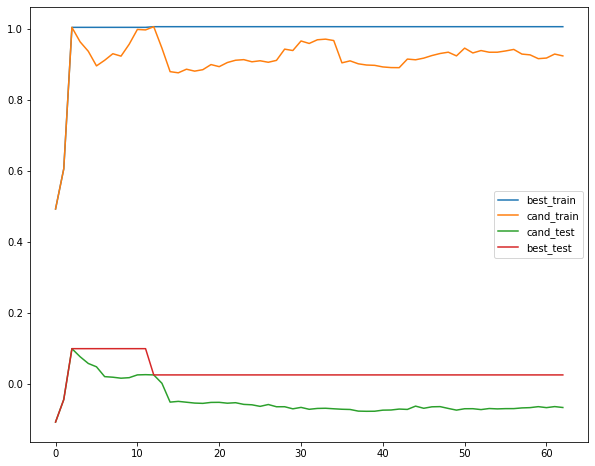

In [11]:
plt.figure(figsize=(10, 8))
plt.plot(list(range(tryOne['iterations'])), tryOne['best_perfList'], label='best_train')
plt.plot(list(range(tryOne['iterations'])), tryOne['cand_perfList'], label='cand_train')
plt.plot(list(range(tryOne['iterations'])), tryOne['cand_test_perfList'], label='cand_test')
plt.plot(list(range(tryOne['iterations'])), tryOne['best_test_perfList'], label='best_test')
plt.legend()
print(tryOne['best_perfList'][-1])
print(tryOne['best_test_perfList'][-1])

In [12]:
tryOne['used_time']

50.451979637145996